<a href="https://colab.research.google.com/github/cagBRT/Data/blob/main/NearMiss_Undersampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NearMiss

NearMiss is **used to perform Under-sampling** based on Near-Miss methods

In [10]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss

In [11]:
X, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=10000, random_state=10)

In [12]:
print('Original dataset shape %s' % Counter(y))
nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 9000, 0: 1000})
Resampled dataset shape Counter({0: 1000, 1: 1000})




---



---



## Below are examples explaining the different NearMiss options

# Import Libraries

In [7]:
import seaborn as sns
sns.set_context("poster")
import numpy as np

In [2]:
def make_plot_despine(ax):
    sns.despine(ax=ax, offset=10)
    ax.set_xlim([0, 3.5])
    ax.set_ylim([0, 3.5])
    ax.set_xticks(np.arange(0, 3.6, 0.5))
    ax.set_yticks(np.arange(0, 3.6, 0.5))
    ax.set_xlabel(r"$X_1$")
    ax.set_ylabel(r"$X_2$")
    ax.legend(loc="upper left", fontsize=16)

# Generate the dataset

In [3]:
rng = np.random.RandomState(18)

X_minority = np.transpose(
    [[1.1, 1.3, 1.15, 0.8, 0.8, 0.6, 0.55], [1.0, 1.5, 1.7, 2.5, 2.0, 1.2, 0.55]]
)
X_majority = np.transpose(
    [
        [2.1, 2.12, 2.13, 2.14, 2.2, 2.3, 2.5, 2.45],
        [1.5, 2.1, 2.7, 0.9, 1.0, 1.4, 2.4, 2.9],
    ]
)

# NearMiss-1
**NearMiss-1 selects samples from the majority class for which the average distance to some *nearest neighbours* is the smallest.** <br>

In the following example, we use a 3-NN to compute the average distance on 2 specific samples of the majority class. Therefore, in this case the point linked by the green-dashed line will be selected since the average distance is smaller.

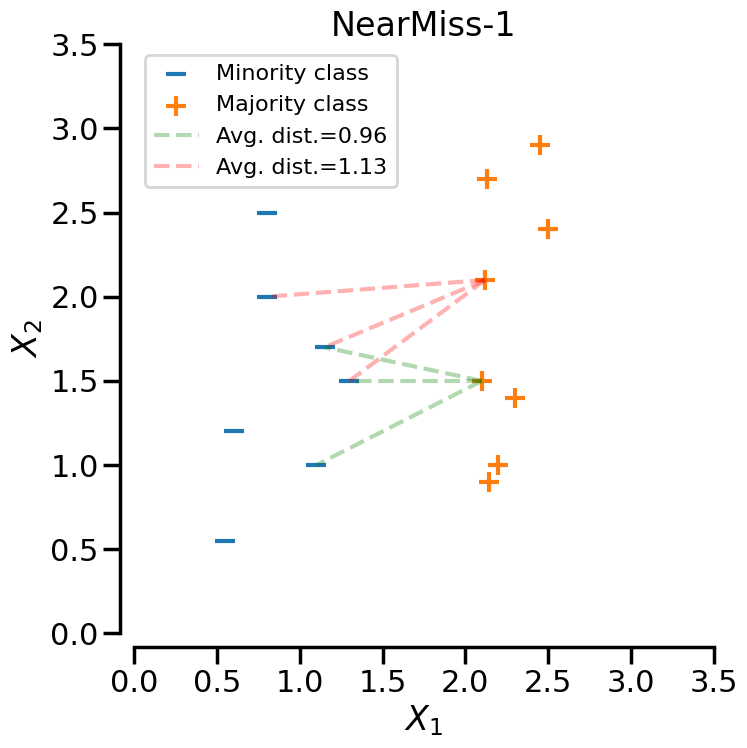

In [4]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    X_minority[:, 0],
    X_minority[:, 1],
    label="Minority class",
    s=200,
    marker="_",
)
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Majority class",
    s=200,
    marker="+",
)
nearest_neighbors = NearestNeighbors(n_neighbors=3)
nearest_neighbors.fit(X_minority)
dist, ind = nearest_neighbors.kneighbors(X_majority[:2, :])
dist_avg = dist.sum(axis=1) / 3

for positive_idx, (neighbors, distance, color) in enumerate(
    zip(ind, dist_avg, ["g", "r"])
):
    for make_plot, sample_idx in enumerate(neighbors):
        ax.plot(
            [X_majority[positive_idx, 0], X_minority[sample_idx, 0]],
            [X_majority[positive_idx, 1], X_minority[sample_idx, 1]],
            "--" + color,
            alpha=0.3,
            label=f"Avg. dist.={distance:.2f}" if make_plot == 0 else "",
        )
ax.set_title("NearMiss-1")
make_plot_despine(ax)
plt.tight_layout()

# NearMiss-2
**NearMiss-2 selects samples from the majority class for which the average distance to the *farthest neighbors* is the smallest.**

With the same configuration as previously presented, the sample linked to the green-dashed line will be selected since its distance the 3 farthest neighbors is the smallest.

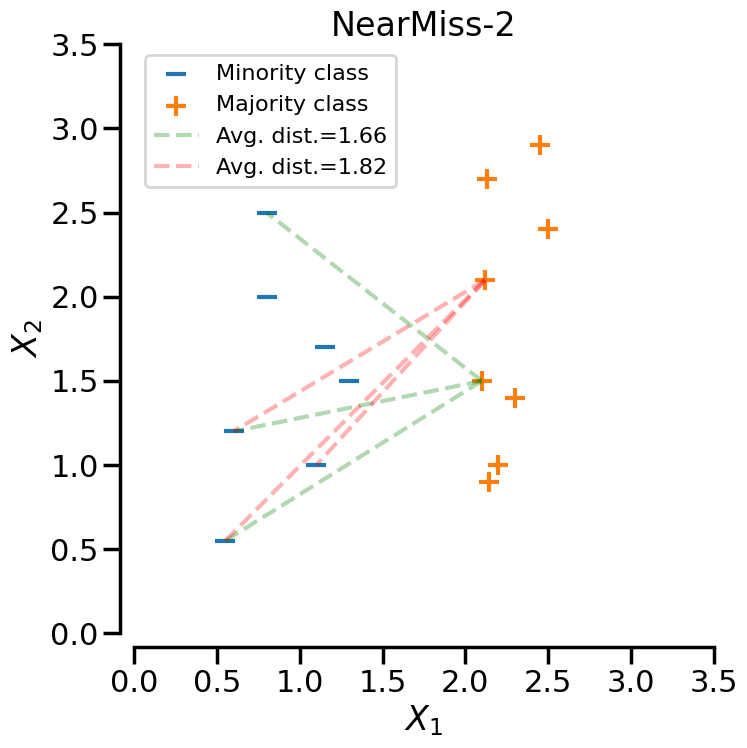

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    X_minority[:, 0],
    X_minority[:, 1],
    label="Minority class",
    s=200,
    marker="_",
)
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Majority class",
    s=200,
    marker="+",
)

nearest_neighbors = NearestNeighbors(n_neighbors=X_minority.shape[0])
nearest_neighbors.fit(X_minority)
dist, ind = nearest_neighbors.kneighbors(X_majority[:2, :])
dist = dist[:, -3::]
ind = ind[:, -3::]
dist_avg = dist.sum(axis=1) / 3

for positive_idx, (neighbors, distance, color) in enumerate(
    zip(ind, dist_avg, ["g", "r"])
):
    for make_plot, sample_idx in enumerate(neighbors):
        ax.plot(
            [X_majority[positive_idx, 0], X_minority[sample_idx, 0]],
            [X_majority[positive_idx, 1], X_minority[sample_idx, 1]],
            "--" + color,
            alpha=0.3,
            label=f"Avg. dist.={distance:.2f}" if make_plot == 0 else "",
        )
ax.set_title("NearMiss-2")
make_plot_despine(ax)
plt.tight_layout()

# NearMiss-3
NearMiss-3 can be divided into 2 steps.

1. a nearest-neighbors is used to short-list samples from the majority class (i.e. correspond to the highlighted samples in the following plot).

2. the sample with the largest average distance to the k nearest-neighbors are selected.

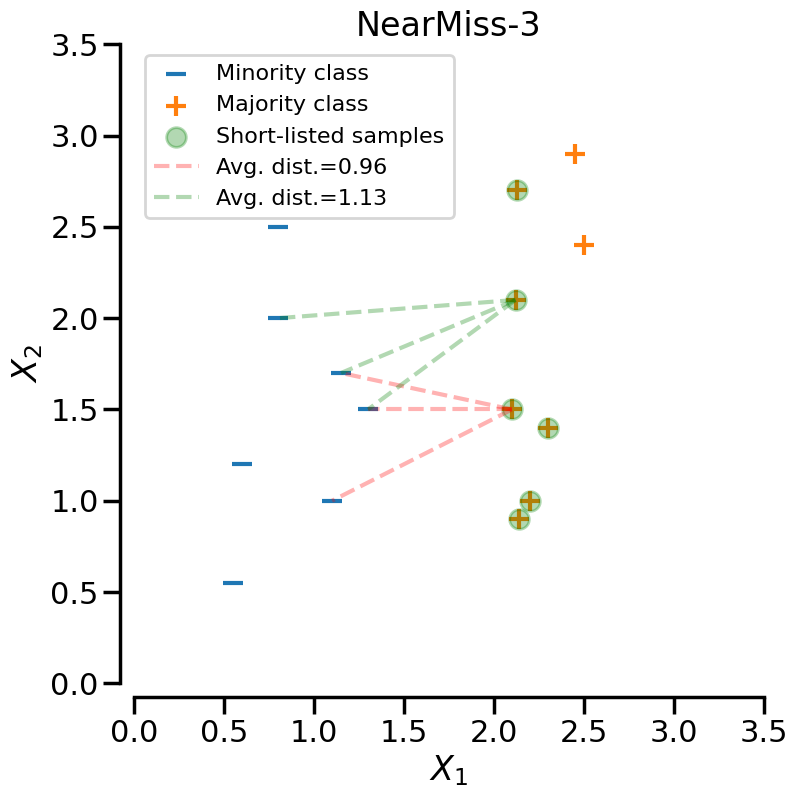

In [6]:
fig, ax = plt.subplots(figsize=(8.5, 8.5))
ax.scatter(
    X_minority[:, 0],
    X_minority[:, 1],
    label="Minority class",
    s=200,
    marker="_",
)
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Majority class",
    s=200,
    marker="+",
)

nearest_neighbors = NearestNeighbors(n_neighbors=3)
nearest_neighbors.fit(X_majority)

# select only the majority point of interest
selected_idx = nearest_neighbors.kneighbors(X_minority, return_distance=False)
X_majority = X_majority[np.unique(selected_idx), :]
ax.scatter(
    X_majority[:, 0],
    X_majority[:, 1],
    label="Short-listed samples",
    s=200,
    alpha=0.3,
    color="g",
)
nearest_neighbors = NearestNeighbors(n_neighbors=3)
nearest_neighbors.fit(X_minority)
dist, ind = nearest_neighbors.kneighbors(X_majority[:2, :])
dist_avg = dist.sum(axis=1) / 3

for positive_idx, (neighbors, distance, color) in enumerate(
    zip(ind, dist_avg, ["r", "g"])
):
    for make_plot, sample_idx in enumerate(neighbors):
        ax.plot(
            [X_majority[positive_idx, 0], X_minority[sample_idx, 0]],
            [X_majority[positive_idx, 1], X_minority[sample_idx, 1]],
            "--" + color,
            alpha=0.3,
            label=f"Avg. dist.={distance:.2f}" if make_plot == 0 else "",
        )
ax.set_title("NearMiss-3")
make_plot_despine(ax)
plt.tight_layout()
plt.show()